In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statesmodel.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('D:\sal.csv')

In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
#Visualisation

import seaborn as sns

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


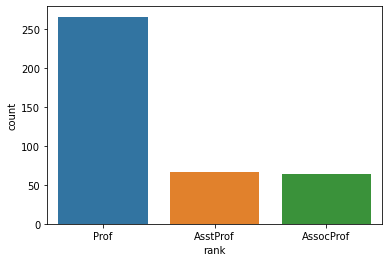

In [7]:
ax=sns.countplot(x="rank",data=df)
print (df["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


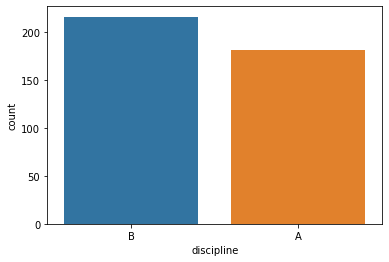

In [8]:
ax=sns.countplot(x="discipline",data=df)
print (df["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


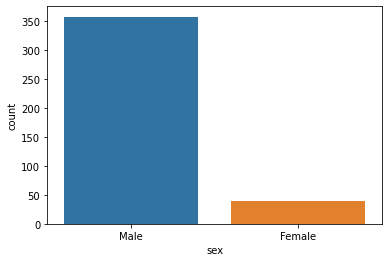

In [8]:
ax=sns.countplot(x="sex",data=df)
print (df["sex"].value_counts())

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

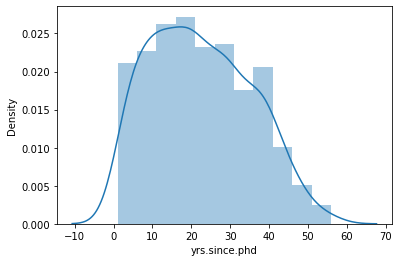

In [9]:
sns.distplot(df['yrs.since.phd'],kde=True)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

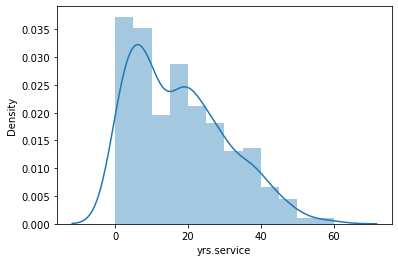

In [10]:
sns.distplot(df['yrs.service'],kde=True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

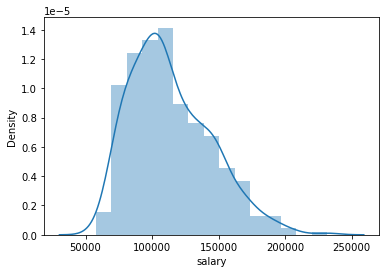

In [12]:
sns.distplot(df['salary'],kde=True)

In [11]:
#Encoding of DataFrame
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
   if df[i].dtypes=="object":
       df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [14]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [12]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

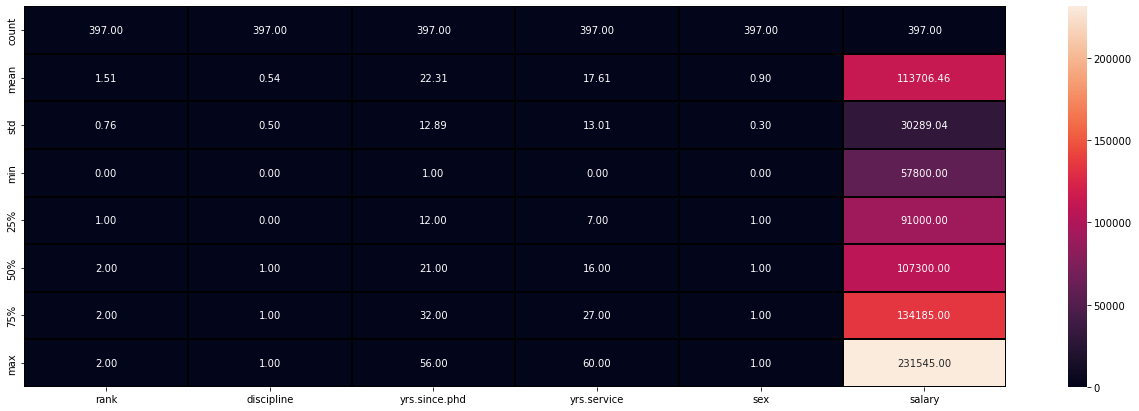

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [14]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

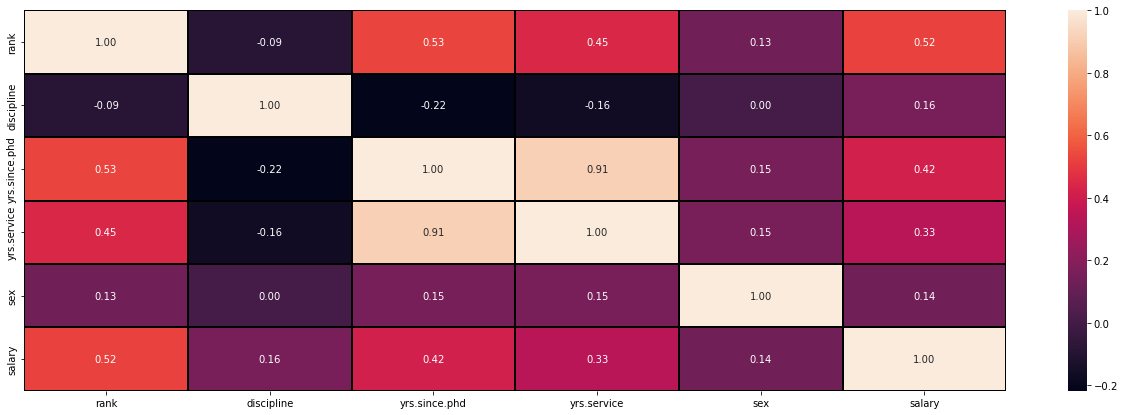

In [15]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

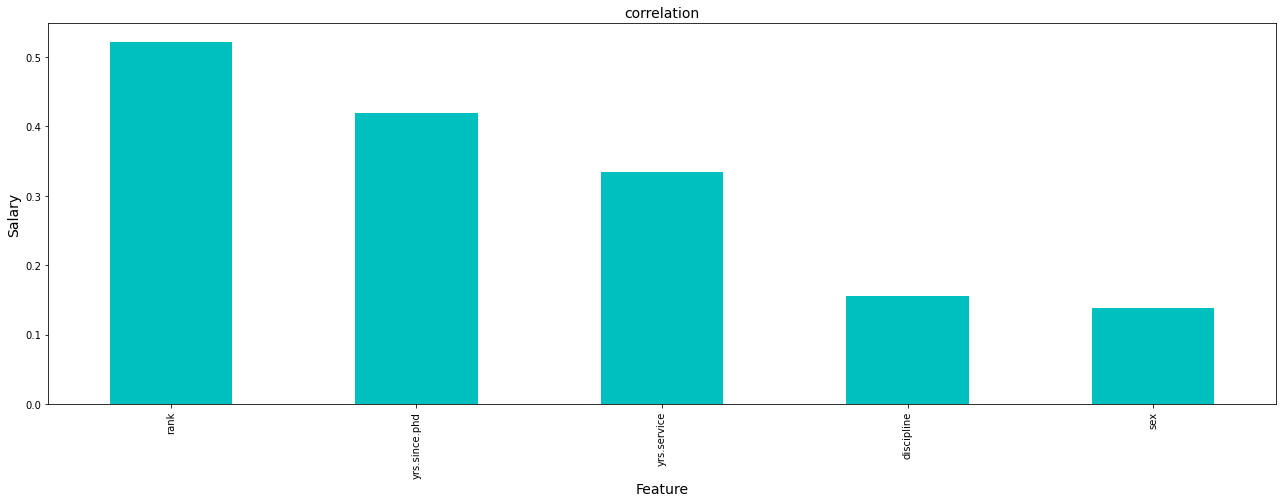

In [16]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(["salary"]).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Salary',fontsize=14)
plt.title('correlation',fontsize=14)
plt.show()

In [19]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [20]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

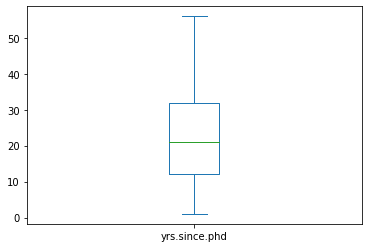

In [21]:
df["yrs.since.phd"].plot.box()

<AxesSubplot:>

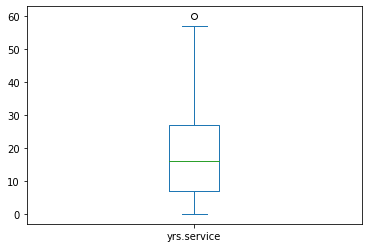

In [22]:
df["yrs.service"].plot.box()

<AxesSubplot:>

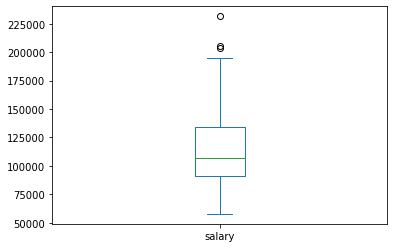

In [23]:
df["salary"].plot.box()

In [24]:
df.shape

features =df.drop("salary",axis=1)
target=df["salary"]

In [25]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.3611999954853077
At random state 0,the training accuracy is:- 0.4079258314975236


At random state 1,the training accuracy is:- 0.3604245854198438
At random state 1,the training accuracy is:- 0.41633641876629457


At random state 2,the training accuracy is:- 0.37547390964955596
At random state 2,the training accuracy is:- 0.3600189554526694


At random state 3,the training accuracy is:- 0.3847313825130595
At random state 3,the training accuracy is:- 0.3293529875010861


At random state 4,the training accuracy is:- 0.38517450334380465
At random state 4,the training accuracy is:- 0.304400813331562


At random state 5,the training accuracy is:- 0.3950033630150771
At random state 5,the training accuracy is:- 0.2752907752774737


At random state 6,the training accuracy is:- 0.3650308031752799
At random state 6,the training accuracy is:- 0.40189870806075667


At random state 7,the training accuracy is:- 0.3575963886324032
At random state 7,the t

In [28]:
lr.fit(features_train,target_train)

LinearRegression()

In [29]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=80)

In [30]:
pred_test=lr.predict(features_test)

In [31]:
print(r2_score(target_test,pred_test))

0.5153333389373497


In [32]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print (f" At cross fold {j} the cv score is {cv_mean} and the accuracy score for the training is {Train_accuracy} and for the testing is {Test_accuracy}")
    print("\n")
    
          
         

 At cross fold 2 the cv score is 0.3270801167406512 and the accuracy score for the training is -0.4221638641130263 and for the testing is 0.5153333389373497


 At cross fold 3 the cv score is 0.3203328673059879 and the accuracy score for the training is -0.4221638641130263 and for the testing is 0.5153333389373497


 At cross fold 4 the cv score is 0.3218196693768362 and the accuracy score for the training is -0.4221638641130263 and for the testing is 0.5153333389373497


 At cross fold 5 the cv score is 0.29569928663871775 and the accuracy score for the training is -0.4221638641130263 and for the testing is 0.5153333389373497


 At cross fold 6 the cv score is 0.33096341839295546 and the accuracy score for the training is -0.4221638641130263 and for the testing is 0.5153333389373497


 At cross fold 7 the cv score is 0.3257704419996536 and the accuracy score for the training is -0.4221638641130263 and for the testing is 0.5153333389373497


 At cross fold 8 the cv score is 0.331006058

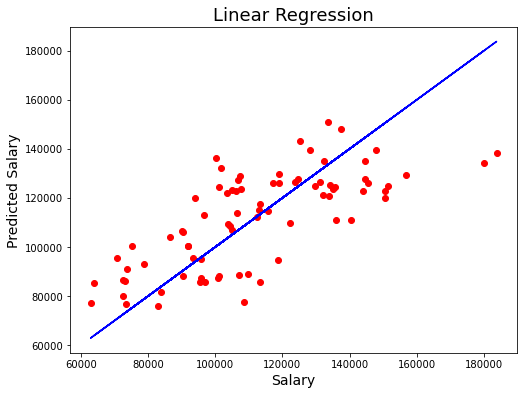

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Predicted Salary',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [38]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [39]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls =ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.508601341551528

In [41]:
cv_score =cross_val_score(ls,features,target,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.3310085148278936

In [42]:
#Ensemble Technique

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf= RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [43]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")

In [45]:
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decison = rf.predict(features_test)

rfs = r2_score(target_test,pred_decison)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=8)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)



R2 Score: 24.578034496952828
Cross Val Score: 32.11148932808666


In [46]:
import pickle 
filename ='churn.pkl'
pickle.dump(ls,open(filename,'wb'))

In [48]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result)

0.508601341551528


In [49]:
conclusion =pd.DataFrame([loaded_model.predict(features_test)[:],pred_decison[:]],index=["predicted","original"])

In [50]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
predicted,124990.877428,128658.225544,109898.366444,113369.874316,121484.562352,93450.217571,115088.224649,90810.193040,81060.59077,94075.211822,...,99146.826723,124587.828824,126683.122358,102618.334594,108700.588748,123272.527095,123416.156532,92545.946975,122656.234644,109264.670392
original,159376.140000,125327.360000,110660.820000,100727.540000,122500.580000,111810.750000,108682.280000,73181.387143,81796.53000,96710.980000,...,88669.668000,146360.040000,112973.586667,86924.550667,113861.070000,185531.270000,148491.787667,81615.135333,98251.060000,107153.060000
